- Student name: Duy Hieu Nguyen
- SID: 33694052

# 1. **Document Clustering**

## Question 1. Expectation Maximisation

### **Task 1: Derive Hard EM for Document Clustering**

Given $N$ collection documents $D = \{d_1, d_2 ... d_n\}$, we would like to partition them into $K$ clusters $C_1, C_2 ... C_k$ and labels $z_n$ to denote the cluster assignments for the $n$ th document $z_n=\{z_{n,1}, z_{n,2}, ... z_{n,k}\}$:
\begin{equation*}
z_{n,k} =
\begin{cases}
1, & \text{if } d_n \in C_k \\
0, & \text{otherwise }
\end{cases}
\end{equation*}
Note that only one element of the cluster assignment vector is 1, and the rest are 0.

The parameters of the model are 
- The clusters proportion $\varphi = (\varphi_1, \varphi_2,... \varphi_k)$ where $\varphi_k \geq 0$ and $\sum_{k=1}^K \varphi_k = 1$ (1)
- The word proportion $\mu_k = (\mu_{k,1}, \mu_{k,2},...\mu_{k,|\mathcal{A}|})$ corresponding to the $k$ th cluster where $\sum_{w \in \mathcal{A}} \mu_{k,w} = 1$ ($\mathcal{A}$ is the dictionary) (2)

In practice, we don't know the cluster label for each document and need to represent the incomplete-data likelihood as the complete-data likelihood marginalized over the hidden variables $z_n$.
$$
\begin{aligned}
p\left(d_1, \ldots, d_N\right)=\prod_{n=1}^N p\left(d_n\right) & =\prod_{n=1}^N \sum_{k=1}^K p\left(z_{n, k}=1, d_n\right) \\
& =\prod_{n=1}^N \sum_{k=1}^K\left(\varphi_k \prod_{w \in \mathcal{A}} \mu_{k, w}^{c\left(w, d_n\right)}\right)
\end{aligned}
$$
where $c(w, d_n)$ is number of word $w$ in $n$ th document $d_n$.

The log-likelihood is:
$$
\begin{aligned}
\ln p\left(d_1, \ldots, d_N\right)=\sum_{n=1}^N \ln p\left(d_n\right) & =\sum_{n=1}^N \ln \sum_{k=1}^K p\left(z_{n, k}=1, d_n\right) \\
& =\sum_{n=1}^N \ln \sum_{k=1}^K\left(\varphi_k \prod_{w \in \mathcal{A}} \mu_{k, w}^{c\left(w, d_n\right)}\right)
\end{aligned}
$$

To maximise the above incomplete data log-likelihood objective, we resort to the **EM Algorithm**
- **Q function**:
$$
\begin{aligned}
Q\left(\boldsymbol{\theta}, \boldsymbol{\theta}^{\text {old }}\right) & :=\sum_{n=1}^N \sum_{k=1}^K p\left(z_{n, k}=1 \mid d_n, \boldsymbol{\theta}^{\text {old }}\right) \ln p\left(z_{n, k}=1, d_n \mid \boldsymbol{\theta}\right) \\
& =\sum_{n=1}^N \sum_{k=1}^K p\left(z_{n, k}=1 \mid d_n, \boldsymbol{\theta}^{\text {old }}\right)\left(\ln \varphi_k+\sum_{w \in \mathcal{A}} c\left(w, d_n\right) \ln \mu_{k, w}\right) \\
& =\sum_{n=1}^N \sum_{k=1}^K \gamma\left(z_{n, k}\right)\left(\ln \varphi_k+\sum_{w \in \mathcal{A}} c\left(w, d_n\right) \ln \mu_{k, w}\right) \\
& = \sum_{n=1}^N \sum_{k=1}^K \gamma\left(z_{n, k}\right)\ln \varphi_k+\sum_{n=1}^N \sum_{k=1}^K \gamma\left(z_{n, k}\right)\sum_{w \in \mathcal{A}} c\left(w, d_n\right) \ln \mu_{k, w}
\end{aligned}
$$
where $\theta$ is the collection of model parameter: $\theta = \{\varphi, \mu_1, \mu_2... \mu_n\}$, and $\gamma$ are the responsibility factors:
$$
\begin{aligned}
\gamma\left(z_n, k\right) & :=p\left(z_{n, k}=1 \mid d_n, \boldsymbol{\theta}^{\text {old }}\right) \\
& = \frac{p(z_{n,k}=1 \mid \boldsymbol{\theta}^{\text {old }}) p(d_n \mid z_{n,k}=1, \boldsymbol{\theta}^{\text {old }}) }{p(d_n \mid \boldsymbol{\theta}^{\text {old }})} \\
& = \frac{\varphi_k \prod\limits_{w \in \mathcal{A}} \mu_{k,w}^{c(w,d)}}{\sum\limits_k \varphi_k \prod\limits_{w \in \mathcal{A}} \mu_{k,w}^{c(w,d)}}
\end{aligned}
$$

To maximise the $Q$ function, we can form the Lagrangian to enforce the constraints (1), (2) above:
$$
L_1(\varphi_k, \lambda_1):= \sum_{n=1}^N \sum_{k=1}^K \gamma\left(z_{n, k}\right)\ln \varphi_k-\lambda_1(\sum_{k=1}^K \varphi_k - 1) \\
L_2(\mu_{k,w}, \lambda_2):= \sum_{n=1}^N \sum_{k=1}^K \gamma\left(z_{n, k}\right)\sum_{w \in \mathcal{A}} c\left(w, d_n\right) \ln \mu_{k, w}-\lambda_2(\sum_{w \in \mathcal{A}} \mu_{k,w} - 1) \\
$$
Setting the derivatives to zero gives:
\begin{align*}
\left\{
\begin{split}
& \frac{\partial L_1}{\partial \varphi_k} = \frac{1}{\varphi_k} \sum_{n=1}^N \gamma(z_{n, k}) - \lambda_1 = 0 \\
& \frac{\partial L_1}{\partial \lambda_1} = \sum_{k=1}^K \varphi_k - 1 = 0
\end{split}
\Rightarrow
\left\{
\begin{split}
& \varphi_k = \frac{1}{\lambda_1} \sum_{n=1}^N \gamma(z_{n, k}) \\
& \sum_{k=1}^K \left(\frac{1}{\lambda_1} \sum_{n=1}^N \gamma(z_{n, k})\right) - 1 = 0
\end{split}
\Rightarrow
\left\{
\begin{split}
& \lambda_1 = \sum_{n=1}^N \sum_{k=1}^K \gamma(z_{n, k}) = N \\
& \varphi_k = \frac{1}{N} \sum_{n=1}^N \gamma(z_{n, k}) = \frac{N_k}{N}
\end{split}
\right.
\right.
\right.
\end{align*}
and
\begin{align*}
\left\{
\begin{split}
& \frac{\partial L_2}{\partial \mu_{k, w}} = \frac{1}{\mu_{k, w}} \sum_{n=1}^N \gamma(z_{n, k}) c(w, d_n) - \lambda_2 = 0 \\
& \frac{\partial L_2}{\partial \lambda_2} = \sum_{w \in \mathcal{A}} \mu_{k, w} - 1 = 0
\end{split}
\Rightarrow
\left\{
\begin{split}
& \mu_{k, w} = \frac{1}{\lambda_2} \sum_{n=1}^N \gamma(z_{n, k}) c(w, d_n) \\
& \sum_{w \in \mathcal{A}} \left(\frac{1}{\lambda_2} \sum_{n=1}^N \gamma(z_{n, k}) c(w, d_n)\right) - 1 = 0
\end{split}
\Rightarrow
\left\{
\begin{split}
& \lambda_2 = \sum_{w \in \mathcal{A}} \sum_{n=1}^N \gamma(z_{n, k}) c(w, d_n) \\
& \mu_{k, w} = \frac{\sum_{n=1}^N \gamma(z_{n, k}) c(w, d_n)}{\sum_{w \in \mathcal{A}} \sum_{n=1}^N \gamma(z_{n, k}) c(w, d_n)}
\end{split}
\right.
\right.
\right.
\end{align*}


Thus, we have:
- The mixing components:
$$
\varphi_k=\frac{N_k}{N} {\text { where }} N_k:=\sum_{n=1}^N \gamma\left(z_{n, k}\right) \tag{3}
$$
- The word proportion parameters for each cluster:
$$
\mu_{k, w}=\frac{\sum_{n=1}^N \gamma\left(z_{n, k}\right) c\left(w, d_n\right)}{\sum_{w^{\prime} \in \mathcal{A}} \sum_{n=1}^N \gamma\left(z_{n, k}\right) c\left(w^{\prime}, d_n\right)} \tag{4}
$$

However, in **Hard EM**, only the most probable value for the latent variable is chosen. Thus:
$$
Z^*=\operatorname{argmax}_z \gamma\left(z_{n, k}\right)
$$
And there is no expectation in over the latent variables in the definition of the $Q$ function. Thus:
$$
Q\left(\theta, \theta^{o l d}\right)=\sum_{n=1}^N \ln p\left(z_{n, k=Z^*}=1, d_n \mid \theta\right)
$$

#### **The Hard EM Algorithm:**
**1.** Choose an initial setting for the parameters $\theta^{\text {old }}:=\left(\varphi^{\text {old }}, \mu_1^{\text {old }}, \ldots, \mu_k^{\text {old }}\right)$

**2.** While the convergence is not met:
- *Expectation (E) step:* based on the current values for the parameters $\theta^{\text {old }}$ set $\forall n$ and $\forall k$ a $Z^*$:
$$
Z^* \leftarrow \operatorname{argmax}_z \gamma\left(z_{n, k}\right)=\operatorname{argmax} \frac{\varphi_k \prod\limits_{w \in \mathcal{A}} \mu_{k,w}^{c(w,d_n)}}{\sum\limits_k \varphi_k \prod\limits_{w \in \mathcal{A}} \mu_{k,w}^{c(w,d_n)}}=\operatorname{argmax} \varphi_k \prod\limits_{w \in \mathcal{A}} \mu_{k,w}^{c(w,d_n)}
$$
- *Maximization (M) step:* based on the result of $Z^*$, set $\theta^{\text {new }} \leftarrow \operatorname{argmax}_\theta Q\left(\theta, \theta^{\text {old }}\right)$ using the equations (3) and (4) above:

    - $\varphi_k^{\text {new }}=\frac{N_k}{N}$ where $N_k:=\sum\limits_{n=1}^N z_{n, k=Z^*}$ 
    - $\mu_{k, w}^{\text {new }}=\frac{\sum\limits_{n=1}^N z_{n, k=Z^*} c\left(w, d_n\right)}{\sum\limits_{w^{\prime} \in \mathcal{A}} \sum\limits_{n=1}^N z_{n, k=Z^*} c\left(w^{\prime}, d_n\right)}$ 
    
**3.** $\theta^{\text {old }} \leftarrow \theta^{\text {new }}$

### **Task 2: Load file**


In [1]:
import pandas as pd 
import numpy as np

with open('Task2A.txt', 'r') as file:
    text = file.readlines()
all([length == 2 for length in [len(line.split('\t')) for line in text]])
labels, articles = [line.split('\t')[0].strip() for line in text], [line.split('\t')[1].strip() for line in text]
docs = pd.DataFrame(data = zip(labels,articles), columns=['label', 'article'])
docs.label = docs.label.astype('category')
docs.head()

,label,article
0,sci.crypt,ripem frequently asked questions archive name ...
1,sci.crypt,ripem frequently asked questions archive name ...
2,sci.crypt,ripem frequently noted vulnerabilities archive...
3,sci.crypt,certifying authority question answered if you ...
4,sci.crypt,rubber hose cryptanalysis some sick part of me...


In [2]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(lowercase=True,
                     stop_words='english', # remove all casual words
                     min_df=5) # appear at least 5 times
features = cv.fit_transform(raw_documents=articles) 
features.shape

(2373, 8094)

### **Task 3: Implement EM Algorithm for Document Clustering**


#### **Hard EM**

In [3]:
e = 1e-10
class HardEMDocClustering: 
    def __init__(self, K, tau_max=50, epsilon=0.01, random_state=None):
        self.K = K  # number of clusters
        self.tau_max = tau_max  # max number of iterations
        self.epsilon = epsilon  # minimum acceptable error rate
        self.random_state = random_state
        self.labels_ = np.empty(0, dtype=int)  # Initialize labels as an empty array
        np.random.seed(self.random_state)

    def get_params(self, deep=False):
        return {'K': self.K,
                'tau_max': self.tau_max,
                'epsilon': self.epsilon,
                'random_state': self.random_state}

    def __str__(self):
        params = self.get_params()
        return 'HardEMDocClustering({0})'.format(','.join(['='.join([key, str(params[key])]) for key in params.keys()]))

    def __repr__(self):
        return self.__str__()

    def fit(self, X, verbose=False):
        X = X.toarray()
        N = X.shape[0] # number of documents 
        A = X.shape[1] # number of words in dictionary

        ### Initialization ###
        # Assume all clusters have the same prob
        self.Phi_hat_ = np.array([1/self.K] * self.K)
        self.Nk_hat_ =self.Phi_hat_ * N
        # Initialize 'mu' with random values between 0 and 1
        self.Mu_hat_ = np.random.rand(self.K, A)  
        self.Mu_hat_ = self.Mu_hat_ / self.Mu_hat_.sum(axis=1, keepdims=True)
        r = np.zeros((N,self.K))   

        terminate = False
        tau = 0
        Mu_hat_old = self.Mu_hat_
        while not terminate:
            if verbose: print('iteration {0}'.format(tau))
            ### E-Step ###
            # X(d,w) is number of word in document d = c(d,w) 
            for k in range(self.K):
                # numerator of r_nk
                r[:, k] = self.Phi_hat_[k] * np.prod(self.Mu_hat_[k]**X, axis=1)

            ## HARD EM assign max k for each n 
            # => dont need to calc denominator (same for all)
            #       r = r/(r.sum(axis=1,keepdims=True)+e)
            # => argmax of numerator only
            max_clip_function = lambda x:  np.array([1 if i== x.argmax() else 0 for i in range(len(x))])
            z_n_hat = np.array(list(map(max_clip_function, r)), dtype='float32')
            r = z_n_hat


            # Assign the cluster labels to self.labels_
            self.labels_ = np.argmax(r, axis=1)
            
            ### M-Step ###
            # phi(k)
            self.Nk_hat_ = r.sum(axis=0)
            self.Phi_hat_ = self.Nk_hat_ / N
            # mu(k,w)
            self.Mu_hat_ = (r.T @ X)
            self.Mu_hat_ = self.Mu_hat_ / self.Mu_hat_.sum(axis=1, keepdims=True)
            
            tau += 1       
            # check termination condition     
            terminate = ((tau == self.tau_max) or np.allclose(self.Mu_hat_, Mu_hat_old, rtol= self.epsilon))

        return self

    def predict_proba(self, X):
        
        N = X.shape[0]
        r = np.zeros((N, self.K))
        for k in range(self.K):
            r[:, k] = self.Phi_hat_[k] * np.prod(self.Mu_hat_[k]**X, axis=1)
        return r / (r.sum(axis=1, keepdims=True) + e)

    def predict(self, X):
        # X = X.toarray()
        probs = self.predict_proba(X)
        return np.argmax(probs, axis=1)

#### **Soft EM**

In [4]:
e = 1e-10
class SoftEMDocClustering: 
    def __init__(self, K, tau_max=50, epsilon=0.01, random_state=None):
        self.K = K  # number of clusters
        self.tau_max = tau_max  # max number of iterations
        self.epsilon = epsilon  # minimum acceptable error rate
        self.random_state = random_state
        self.labels_ = np.empty(0, dtype=int)  # Initialize labels as an empty array
        np.random.seed(self.random_state)

    def get_params(self, deep=False):
        return {'K': self.K,
                'tau_max': self.tau_max,
                'epsilon': self.epsilon,
                'random_state': self.random_state}

    def __str__(self):
        params = self.get_params()
        return 'SoftEMDocClustering({0})'.format(','.join(['='.join([key, str(params[key])]) for key in params.keys()]))

    def __repr__(self):
        return self.__str__()

    def fit(self, X, verbose=False):
        X = X.toarray()
        N = X.shape[0] # number of documents 
        A = X.shape[1] # number of words in dictionary

        ### Initialization ###
        # Assume all clusters have the same prob
        self.Phi_hat_ = np.array([1/self.K] * self.K)
        self.Nk_hat_ =self.Phi_hat_ * N
        # Initialize 'mu' with random values between 0 and 1
        self.Mu_hat_ = np.random.rand(self.K, A)  
        self.Mu_hat_ = self.Mu_hat_ / self.Mu_hat_.sum(axis=1, keepdims=True)
        r = np.zeros((N,self.K))   

        terminate = False
        tau = 0
        Mu_hat_old = self.Mu_hat_
        while not terminate:
            if verbose: print('iteration {0}'.format(tau))
            ### E-Step ###
            # X(d,w) is number of word in document d = c(d,w) 
            for k in range(self.K):
                # numerator of r_nk
                r[:, k] = self.Phi_hat_[k] * np.prod(self.Mu_hat_[k]**X, axis=1)
            # normalize
            r = r/(r.sum(axis=1,keepdims=True))

            # Assign the cluster labels to self.labels_
            self.labels_ = np.argmax(r, axis=1)

            ### M-Step ###
            # phi(k)
            self.Nk_hat_ = r.sum(axis=0)
            self.Phi_hat_ = self.Nk_hat_ / N
            # mu(k,w)
            self.Mu_hat_ = (r.T @ X)
            self.Mu_hat_ = self.Mu_hat_ / self.Mu_hat_.sum(axis=1, keepdims=True)

            tau += 1            
            # check termination condition
            terminate = ((tau == self.tau_max) or np.allclose(self.Mu_hat_, Mu_hat_old, rtol= self.epsilon))

        return self

    def predict_proba(self, X):
        
        N = X.shape[0]
        r = np.zeros((N, self.K))
        for k in range(self.K):
            r[:, k] = self.Phi_hat_[k] * np.prod(self.Mu_hat_[k]**X, axis=1)
        return r / (r.sum(axis=1, keepdims=True))

    def predict(self, X):
        # X = X.toarray()
        probs = self.predict_proba(X)
        return np.argmax(probs, axis=1)

### **Task 4: Running EM algorithms**

In [5]:
# normalise by dividing each feature row by its L2 norm
from sklearn.preprocessing import Normalizer
l2_norm = Normalizer(norm='l2')
features_normalised = l2_norm.fit_transform(features.toarray())

features_normalised.shape

(2373, 8094)

In [6]:
from sklearn.pipeline import make_pipeline
cv = CountVectorizer(lowercase=True,
                     stop_words='english',
                     min_df=5)
l2_norm = Normalizer(norm='l2')

hem = HardEMDocClustering(K=4, random_state=1, epsilon=0.1)
sem = SoftEMDocClustering(K=4, random_state=1, epsilon=0.1)

pipehem = make_pipeline(cv, l2_norm, hem)
pipehem.fit(articles)

pipesem = make_pipeline(cv, l2_norm, sem)
pipesem.fit(articles)

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(min_df=5, stop_words='english')),
                ('normalizer', Normalizer()),
                ('softemdocclustering',
                 SoftEMDocClustering(K=4,tau_max=50,epsilon=0.1,random_state=1))])

### **Task 5: Plotting and Discussion**
#### **Plotting**

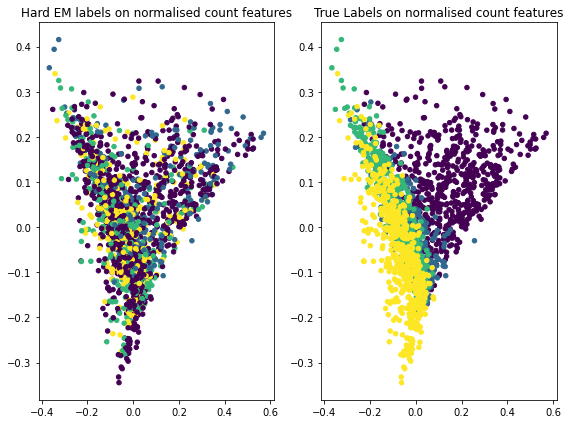

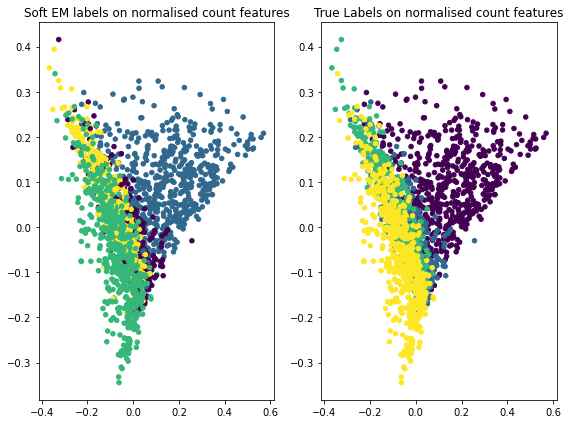

In [7]:
## perform pca

from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

pca = PCA(n_components=2)
_2D_features = pca.fit_transform(features_normalised)

## plot the kmeans outcome
_, axs = plt.subplots(1, 2, figsize=(8, 6), tight_layout=True)
axs[0].scatter(x=_2D_features[:,0], y=_2D_features[:,1], s=20, c = hem.labels_, cmap='viridis')
axs[0].set_title('Hard EM labels on normalised count features')

## plot the original data
axs[1].scatter(x=_2D_features[:,0],y=_2D_features[:,1], s=20, c=docs.label.cat.codes)
axs[1].set_title('True Labels on normalised count features')
plt.show()

## plot the kmeans outcome
_, axs = plt.subplots(1, 2, figsize=(8, 6), tight_layout=True)
axs[0].scatter(x=_2D_features[:,0], y=_2D_features[:,1], s=20, c = sem.labels_, cmap='viridis')
axs[0].set_title('Soft EM labels on normalised count features')

## plot the original data
axs[1].scatter(x=_2D_features[:,0],y=_2D_features[:,1], s=20, c=docs.label.cat.codes)
axs[1].set_title('True Labels on normalised count features')
plt.show()

#### **Observation**
From the graph, it is evident that Soft EM produces results that closely align with the True labels. The data points are meticulously and systematically grouped. 

Conversely, Hard EM yields more random results and less structured. Instead of clear clusters, Hard EM seems to scatter data points indiscriminately, leading to a more chaotic representation.

#### **Explanation**
- **Uncertainty in Data**: The true clusters in data have a lot of overlap and they are not very distinct.

- **Hard EM**: Hard clustering may oversimplify the underlying data structure. In situations where data points are on the boundaries between clusters, hard EM can sometimes make arbitrary decisions on which cluster to assign a point to. Over many points, this can lead to a "messy" appearance if many points are near cluster boundaries. 

- **Soft EM**: is better suited to capture such complex data structures. It provides a more nuanced approach to cluster assignments by assigning probabilities of belonging to each cluster rather than definitive assignments. This means that if a data point lies between two clusters, instead of forcing it into one cluster (as hard clustering would), it can be partly assigned to both. 